# Контест 7
## Задача B. Пакеты SciPy и SymPy

### Часть 1

Найдите глобальный минимум функции $f(x) = x^4 + 9 x^3 + 16 x^2 - 36 x - 8$ при помощи scipy.optimize. Выведите значение этого минимума и точку, в которой он достигается. Найдите оба корня уравнения $f(x) = 0$.

In [1]:
from scipy.optimize import minimize_scalar


def f(x: float) -> float:
    return x**4 + 9 * x**3 + 16 * x**2 - 36 * x - 8

# Находим глобальный минимум функции
res = minimize_scalar(f)

# Выводим значение минимума и точку, в которой он достигается
print(f'Глобальный минимум функции: {res.fun}')
print(f'Точка минимума: {res.x}')

Глобальный минимум функции: -22.03956083175395
Точка минимума: 0.6866771411299589


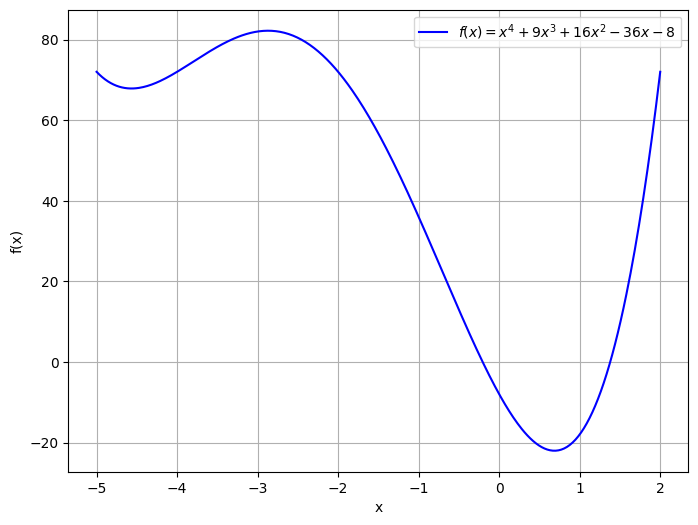

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Создаем массив значений x для построения графика
x_values = np.linspace(-5, 2, 400)
y_values = f(x_values)

# Строим график функции
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$f(x) = x^4 + 9x^3 + 16x^2 - 36x - 8$', color='blue')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)

plt.show()

Видно, что корни находятся на отрезках $[-1,0]$ и $[1,2]$. Зачем вообще делать это? Функция, которая находит нули функции - scipy.optimize.root_scalar, не может вывести два корня сразу по причине "так работают численные методы". Надо указывать отрезки, на концах которых функция имеет разные знаки, для локализации корня. И потом уже вычислять корни на этих отрезках.

In [3]:
from scipy.optimize import root_scalar


# Находим оба корня уравнения f(x) = 0
root1 = root_scalar(f, bracket=[-1, 0])
root2 = root_scalar(f, bracket=[1, 2])

# Выводим корни уравнения
print("Корень 1:", root1.root)
print("Корень 2:", root2.root)

Корень 1: -0.20556359726279055
Корень 2: 1.37900341694332


### Часть 2

Вычислитьте символьно неопределённый интеграл функции $\sqrt[3]{x}$. Символьно и численно посчитайте интеграл от этой функции в пределах от $1$ до $8$.

In [12]:
import sympy as sp


# Строим интеграл
x = sp.Symbol('x')
f = x**sp.Rational(1, 3)
integral = sp.Integral(f)

# Вычисление неопределеного интеграла символьно
sp.Eq(integral, integral.doit())

Eq(Integral(x**(1/3), x), 3*x**(4/3)/4)

In [13]:
# Вычисление определенного интеграла от 1 до 8 символьно
res = sp.integrate(f, (x, 1, 8))
res

45/4

In [8]:
from scipy.integrate import quad


# Вычисление определенного интеграла от 1 до 8 численно
res, _ = quad(lambda x: x ** (1/3), 1, 8)
res

11.249999999999973

### Часть 3

Найдите решение уравнения Риккати $x^2 y' + xy + x^2 y^2 = 4$ при помощи sympy.dsolve. В получившемся решении не должно быть тригонометрических функций.

In [6]:
import sympy as sp


x = sp.Symbol('x')
y = sp.Function('y')(x)

solution = sp.dsolve(x**2 * sp.diff(y, x) + x * y + x**2 * y**2 - 4, hint='1st_rational_riccati')

solution

Eq(y(x), 2*(-C1 + x**4 + 1)/(x*(C1 + x**4 - 1)))

### Часть 4

Загрузите изображение http://www.dip.ee.uct.ac.za/imageproc/stdimages/greyscale/lena.tif в виде матрицы $512 \times 512$ при помощи imageio.imread. Визуализируйте его при помощи функции imshow из matplotlib с параметром cmap="gray".

Найдите сингулярное разложение (SVD) полученной матрицы. Это разложение имеет вид $M = U \Sigma V^T$, где $M$ — исходная матрица, $U$ и $V$ — матрицы левых и правых сингулярных векторов соответственно, $\Sigma$ — диагональная матрица, у которой на главной диагонали расположены сингулярные числа.

SVD-разложение можно использовать для понижения размерности или ранга матрицы. Для этого необходимо оставить некоторое число $k$ наибольших (или, как часто говорят, старших) сингулярных чисел и соответствующие им сингулярные вектора. В результате получаем матрицу $M_k = U_k \Sigma_k V_k^T$, где $\Sigma_k$ — диагональная матрица размерности $k \times k$, содержащая $k$ старших сингулярных чисел, а $U_k$ и $V_k$ — матрицы, состоящие из k левых и правых сингулярных векторов соответственно. Данный метод понижения размерности ещё называют методом главных компонент или PCA (англ. principal component analysis), он имеет широкое применение в машинном обучении (например, для понижения размерности признакового пространства или визуализации данных) и других областях.

Используя старшие $k = 1, 2, 4, 8, 16, 32, 64, 128, 256, 512$ сингулярных чисел, понизьте ранг матрицы. Вычислите нормы Фробениуса матриц разности исходной матрицы и матриц после понижения ранга. Визуализируйте матрицы после понижения ранга. Если всё сделано правильно, то при увеличении количества сингулярных чисел норма должна уменьшаться, а если мы берём все $100$ сингулярных чисел, то норма должна быть близка к $0$. Также при $k = 16$ на изображении уже должно быть можно увидеть черты лица.

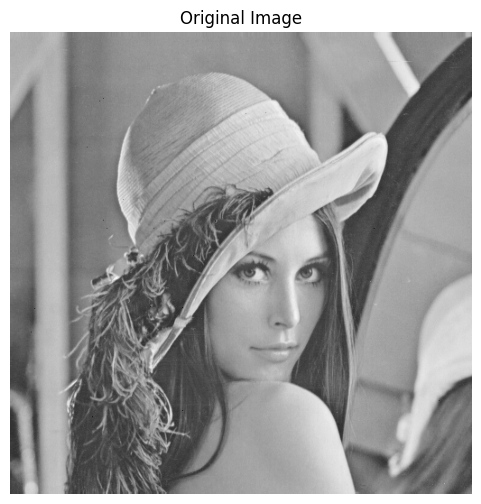

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as imageio


# Загрузка изображения
image = imageio.imread('http://www.dip.ee.uct.ac.za/imageproc/stdimages/greyscale/lena.tif')

# Визуализация исходного изображения
plt.figure(figsize=(6, 6))
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.axis('off')
plt.show()

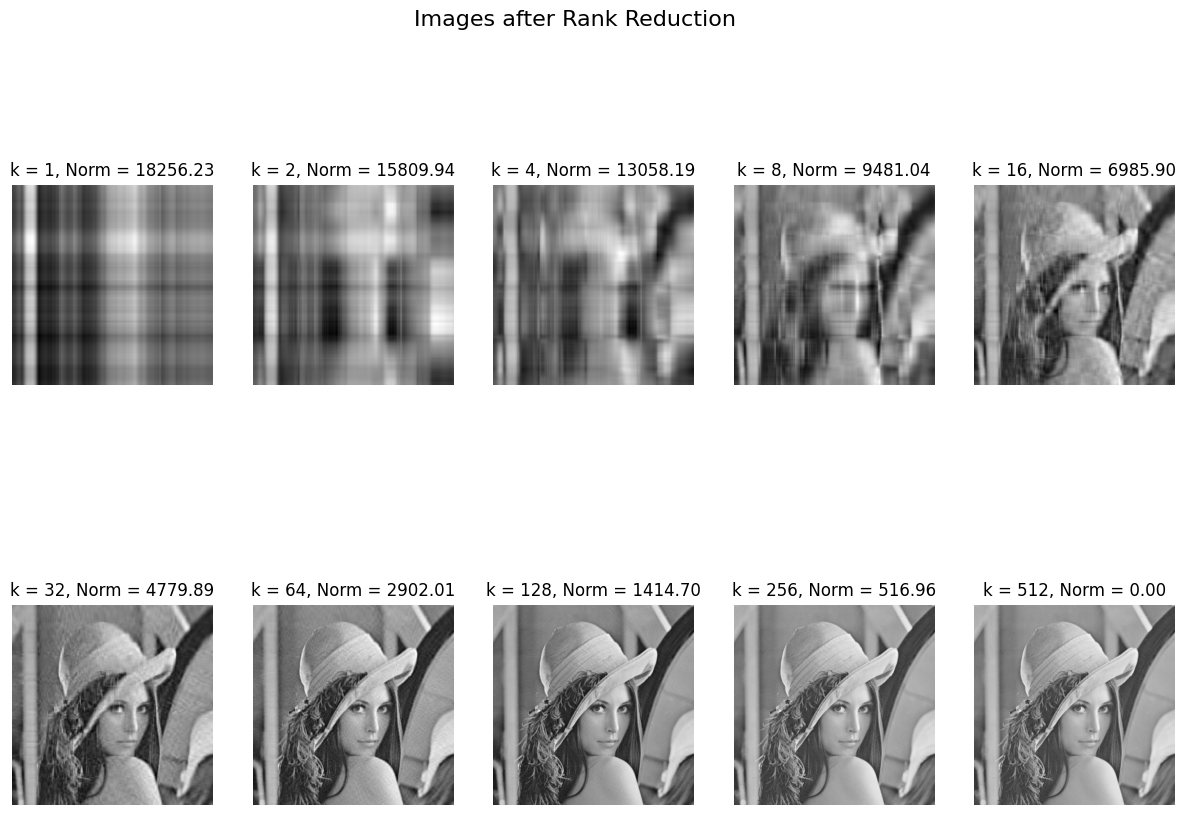

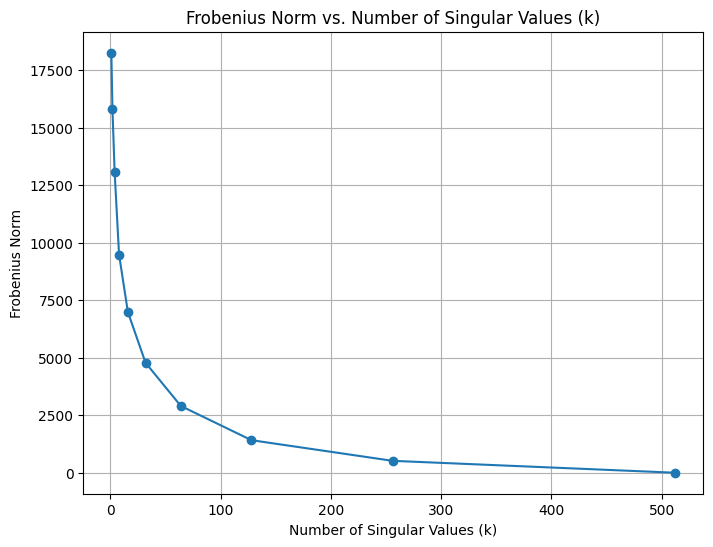

In [9]:
# Сингулярное разложение (SVD) исходной матрицы
U, S, Vt = np.linalg.svd(image)

k_values = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
frobenius_norms = []

# Визуализация матриц после понижения ранга
plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values, 1):
    # Оставляем только k старших сингулярных чисел и соответствующие векторы
    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    Vt_k = Vt[:k, :]
    
    # Матрица после понижения ранга
    reduced_image = np.dot(U_k, np.dot(S_k, Vt_k))
    
    # Вычисление нормы Фробениуса
    frobenius_norm = np.linalg.norm(image - reduced_image, ord='fro')
    frobenius_norms.append(frobenius_norm)
    
    # Визуализация матрицы после понижения ранга
    plt.subplot(2, 5, i)
    plt.imshow(reduced_image, cmap="gray")
    plt.title(f"k = {k}, Norm = {frobenius_norm:.2f}")
    plt.axis('off')

plt.suptitle("Images after Rank Reduction", fontsize=16)
plt.show()

# Визуализация нормы Фробениуса для различных значений k
plt.figure(figsize=(8, 6))
plt.plot(k_values, frobenius_norms, marker='o')
plt.title("Frobenius Norm vs. Number of Singular Values (k)")
plt.xlabel("Number of Singular Values (k)")
plt.ylabel("Frobenius Norm")
plt.grid(True)
plt.show()

### Часть 5

Найдите любое фото некоторого объекта на одноцветном фоне (фото на фоне хромакея). Замените фон на любое другое изображение. Исходное изображение не должно быть слишком простым, на фоне должны присутствовать небольшие тени или градиент.

Например, можно сделать скриншот лекции Сергея Андреевича (https://youtu.be/a7M9m2cstgk) и отправить его покорять Эверест. Пример входных данных и результата работы программы можно посмотреть здесь: https://disk.yandex.ru/d/aZH_SfT9Z2tpSg

Для устранения дыр и лишних вкраплений при нахождении фона можно использовать функциями scripy.ndimage.binary_opening, scipy.ndimage.binary_closing и scipy.ndimage.binary_fill_holes.